# 상가(상권)정보 분석하기

* 데이터 출처 : 공공데이터포털
* 소상공인 상권정보 상가업소 데이터
* 데이터셋 다운로드 : http://bit.ly/open-data-set-folder


## 데이터셋을 엑셀에서 열어보는 방법
MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기 
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.
 
 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다. 
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다. 
     * UTF-8의 코드 페이지 넘버는 65001입니다.
 
   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다. 
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.  
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택   

# 라이브러리 로드

In [7]:
# 라이브러리 로드하기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 설정

<AxesSubplot:title={'center':'한글폰트 설정'}>

C:\devssom\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\devssom\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\devssom\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\devssom\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\devssom\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\devssom\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\devssom\lib\site-packages\matpl

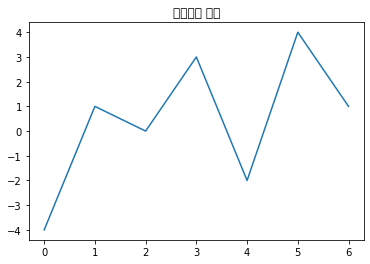

In [6]:
# 한글폰트로 설정되어있는지 확인하는 방법

# 먼저 더미로 시리즈를 만들어서 그래프를 그려보면, 폰트가 깨지는게 보여
pd.Series([-4, 1, 0, 3, -2, 4, 1]).plot(title="한글폰트 설정")

In [12]:
# 한글폰트로 설정하기

plt.rc("font", family="Malgun Gothic")

<AxesSubplot:title={'center':'한글폰트 설정'}>

C:\devssom\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\devssom\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


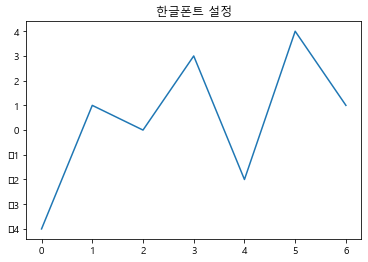

In [13]:
# 한글폰트 설정됐는지 다시 확인

pd.Series([-4, 1, 0, 3, -2, 4, 1]).plot(title="한글폰트 설정")

이제 한글폰트는 안깨지는데, -(마이너스) 값이 깨져보임

<AxesSubplot:title={'center':'한글폰트 설정'}>

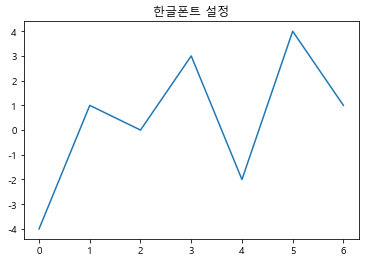

In [16]:
# 마이너스 안깨지게 하려면

plt.rc("axes", unicode_minus=False)

pd.Series([-4, 1, 0, 3, -2, 4, 1]).plot(title="한글폰트 설정")

<AxesSubplot:title={'center':'한글폰트 설정'}>

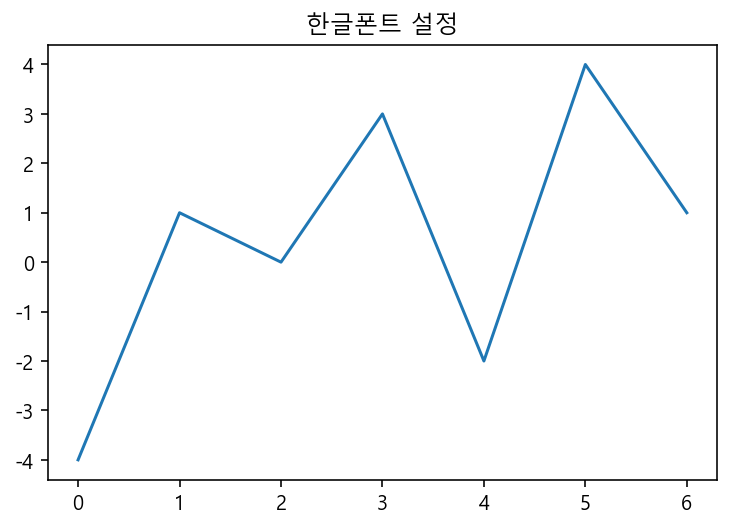

In [19]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 하려면

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

pd.Series([-4, 1, 0, 3, -2, 4, 1]).plot(title="한글폰트 설정")

# 파일 로드

In [21]:
# 데이터 파일은 주피터 노트북 파일하고 같은 경로에 넣어놓는게 좋음

%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7850-43A2

 C:\Users\최여사\devssom\data_analysis\public_data\data 디렉터리

2021-07-21  오후 08:36    <DIR>          .
2021-07-21  오후 08:36    <DIR>          ..
2021-07-21  오후 08:26       166,774,108 소상공인시장진흥공단_상가(상권)정보_서울_202103.csv
2021-07-19  오후 05:50             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2021-07-19  오후 04:24           220,777 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv
               3개 파일         166,997,048 바이트
               2개 디렉터리  418,655,305,728 바이트 남음


In [24]:
# 파일 로드하기
# sep = 구분기호

df = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_서울_202103.csv", sep=',')
df.shape

(315555, 39)

In [25]:
# 데이터가 어떤지 ... 요약 없이 다 보고싶다면
# 모든 컬럼이 표시되도록 max_columns의 수를 지정하기

pd.options.display.max_columns = 39

# 미리보기
## head, tall

In [26]:
# head로 미리보기

df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100208540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,102,126.991394,37.488375
1,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11590,동작구,1159063000,사당2동,1159010700,사당동,1159010700201390072,1,대지,139,72.0,서울특별시 동작구 사당동 139-72,115904157119,서울특별시 동작구 동작대로27가길,12,NaN,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105
2,17174096,채움,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111012400,수송동,1111012400200580000,1,대지,58,NaN,서울특별시 종로구 수송동 58,111103100006,서울특별시 종로구 삼봉로,81,NaN,1111012400100580000017956,두산위브파빌리온,서울특별시 종로구 삼봉로 81,110858,3150.0,NaN,NaN,NaN,126.981794,37.572387
3,17174062,호구의주방,NaN,D,소매,D07,가정/주방/인테리어,D07A17,주방가구판매,G47520,가구 소매업,11,서울특별시,11560,영등포구,1156062000,양평2동,1156012800,양평동4가,1156012800201600002,1,대지,160,2.0,서울특별시 영등포구 양평동4가 160-2,115603005074,서울특별시 영등포구 선유로,269,NaN,1156012800101600002019768,약산상가아파트,서울특별시 영등포구 선유로 269,150867,7206.0,NaN,NaN,NaN,126.897892,37.536700
4,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,NaN,11,서울특별시,11710,송파구,1171053200,거여2동,1171011300,거여동,1171011300200360000,1,대지,36,NaN,서울특별시 송파구 거여동 36,117103123014,서울특별시 송파구 오금로,527,NaN,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054


In [27]:
# tail로 미리보기

df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
315550,17456530,명칭없음,NaN,F,생활서비스,F02,세탁/가사서비스,F02A05,청소/소독,NaN,NaN,11,서울특별시,11560,영등포구,1156055000,당산1동,1156011200,당산동2가,1156011200200370000,1,대지,37,NaN,서울특별시 영등포구 당산동2가 37,115603118022,서울특별시 영등포구 영등포로,103,NaN,1156011200100370000031023,하나비즈타워,서울특별시 영등포구 영등포로 103,150042,7264.0,NaN,NaN,703,126.893175,37.522059
315551,17431017,명칭없음,NaN,F,생활서비스,F02,세탁/가사서비스,F02A05,청소/소독,NaN,NaN,11,서울특별시,11710,송파구,1171062000,가락본동,1171010700,가락동,1171010700200310001,1,대지,31,1.0,서울특별시 송파구 가락동 31-1,117104169370,서울특별시 송파구 양재대로66길,30,NaN,1171010700100310001027156,삼신빌딩,서울특별시 송파구 양재대로66길 30,138801,5704.0,NaN,5,501-1,127.124403,37.500428
315552,17433389,두근돼지김치찜,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11500,강서구,1150061100,발산1동,1150010500,마곡동,1150010500208000015,1,대지,800,15.0,서울특별시 강서구 마곡동 800-15,115003155052,서울특별시 강서구 마곡중앙2로,35,NaN,1150010500108000015000001,이너매스마곡2,서울특별시 강서구 마곡중앙2로 35,157210,7806.0,NaN,1,122,126.830519,37.557983
315553,17446911,서래와규짱,서래본점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100208110002,1,대지,811,2.0,서울특별시 서초구 방배동 811-2,116504163269,서울특별시 서초구 방배로34길,4,NaN,1165010100108110002008820,NaN,서울특별시 서초구 방배로34길 4,137831,6585.0,NaN,NaN,NaN,126.991262,37.492275
315554,17447645,맵도니매운갈비찜,역삼점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100208230000,1,대지,823,NaN,서울특별시 강남구 역삼동 823,116803122010,서울특별시 강남구 테헤란로,124,NaN,1168010100108230000026266,삼원타워,서울특별시 강남구 테헤란로 124,135784,6234.0,NaN,1,110-1,127.031685,37.498776


## 인덱스 정보 보기

In [29]:
df.index

RangeIndex(start=0, stop=315555, step=1)

## 컬럼 정보만 보기

In [30]:
# 컬럼값만 보기

df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## info

In [31]:
# info로 데이터프레임의 정보보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315555 entries, 0 to 315554
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     315555 non-null  int64  
 1   상호명        315554 non-null  object 
 2   지점명        54989 non-null   object 
 3   상권업종대분류코드  315555 non-null  object 
 4   상권업종대분류명   315555 non-null  object 
 5   상권업종중분류코드  315555 non-null  object 
 6   상권업종중분류명   315555 non-null  object 
 7   상권업종소분류코드  315555 non-null  object 
 8   상권업종소분류명   315555 non-null  object 
 9   표준산업분류코드   297139 non-null  object 
 10  표준산업분류명    297139 non-null  object 
 11  시도코드       315555 non-null  int64  
 12  시도명        315555 non-null  object 
 13  시군구코드      315555 non-null  int64  
 14  시군구명       315555 non-null  object 
 15  행정동코드      315555 non-null  int64  
 16  행정동명       315555 non-null  object 
 17  법정동코드      315555 non-null  int64  
 18  법정동명       315555 non-null  object 
 19  지번코드       315555 non-n

## 데이터 타입 보기

In [32]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

# 결측치 확인하기

In [34]:
True == 1

True

In [36]:
# 결측치를 구해서 n이라는 변수에 담고 재사용하기

n = df.isnull().sum()

## 결측치 시각화

<AxesSubplot:>

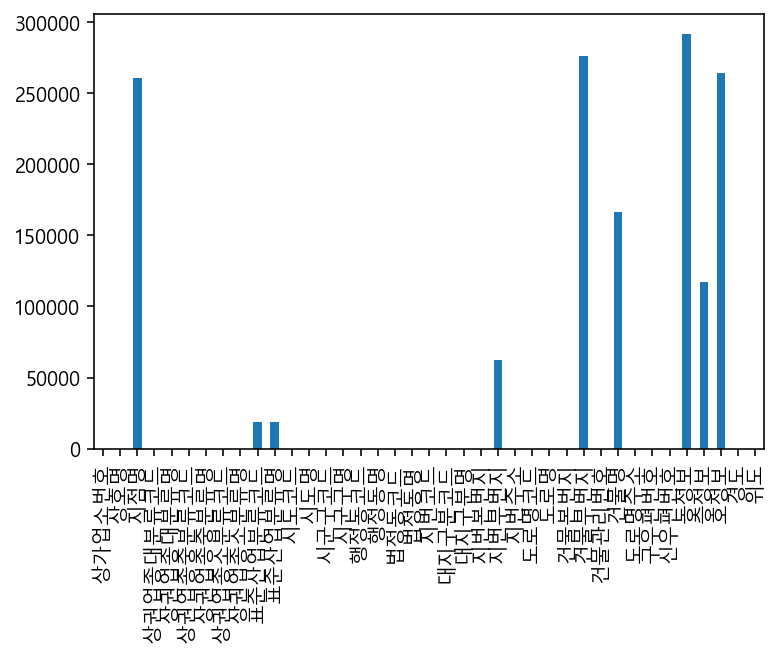

In [39]:
# 막대그래프로 시각화하기

n.plot.bar()

<AxesSubplot:>

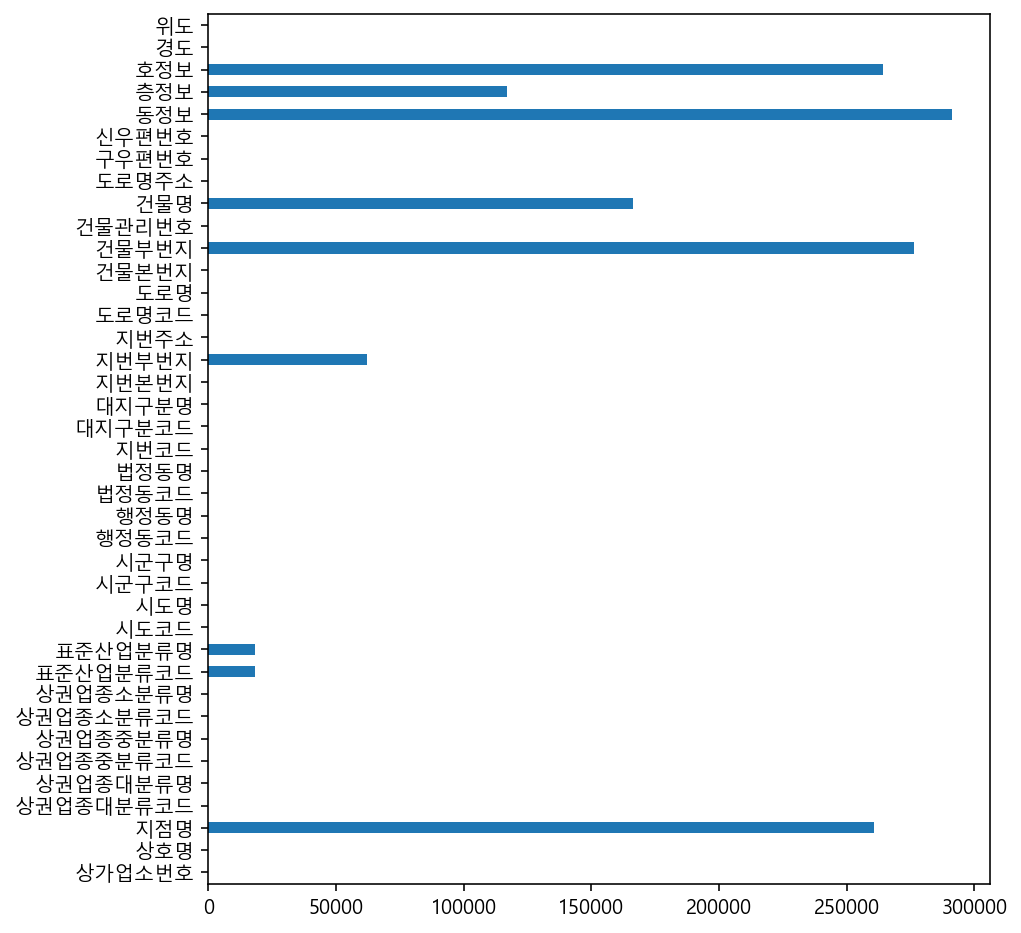

In [42]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도로 barh로 그리기

n.plot.barh(figsize=(7, 8))

<AxesSubplot:>

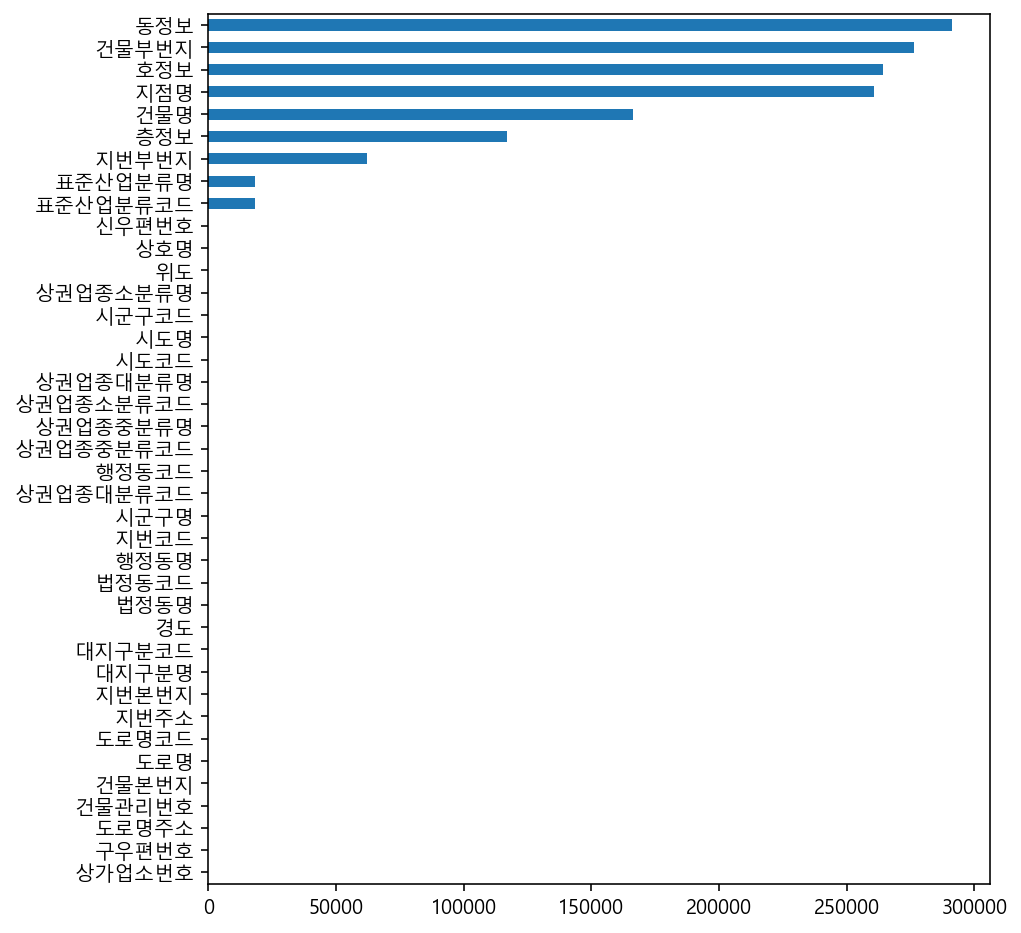

In [43]:
# 내림차순으로 보기

n.sort_values().plot.barh(figsize=(7, 8))

이렇게 결측치를 pandas로 그래프화할 수도 있지만 missingno로도 할 수 있음

## missingno 로 결측치 시각화하기
* 별도의 설치가 필요한 라이브러리
* 아나콘다에서 설치(다음 3가지 중 하나의 명령어를 사용)
    * conda install -c conda-forge missingno
    * conda install -c conda-forge/label/gcc7 missingno
    * conda install -c conda-forge/label/cf201901 missingno

<AxesSubplot:>

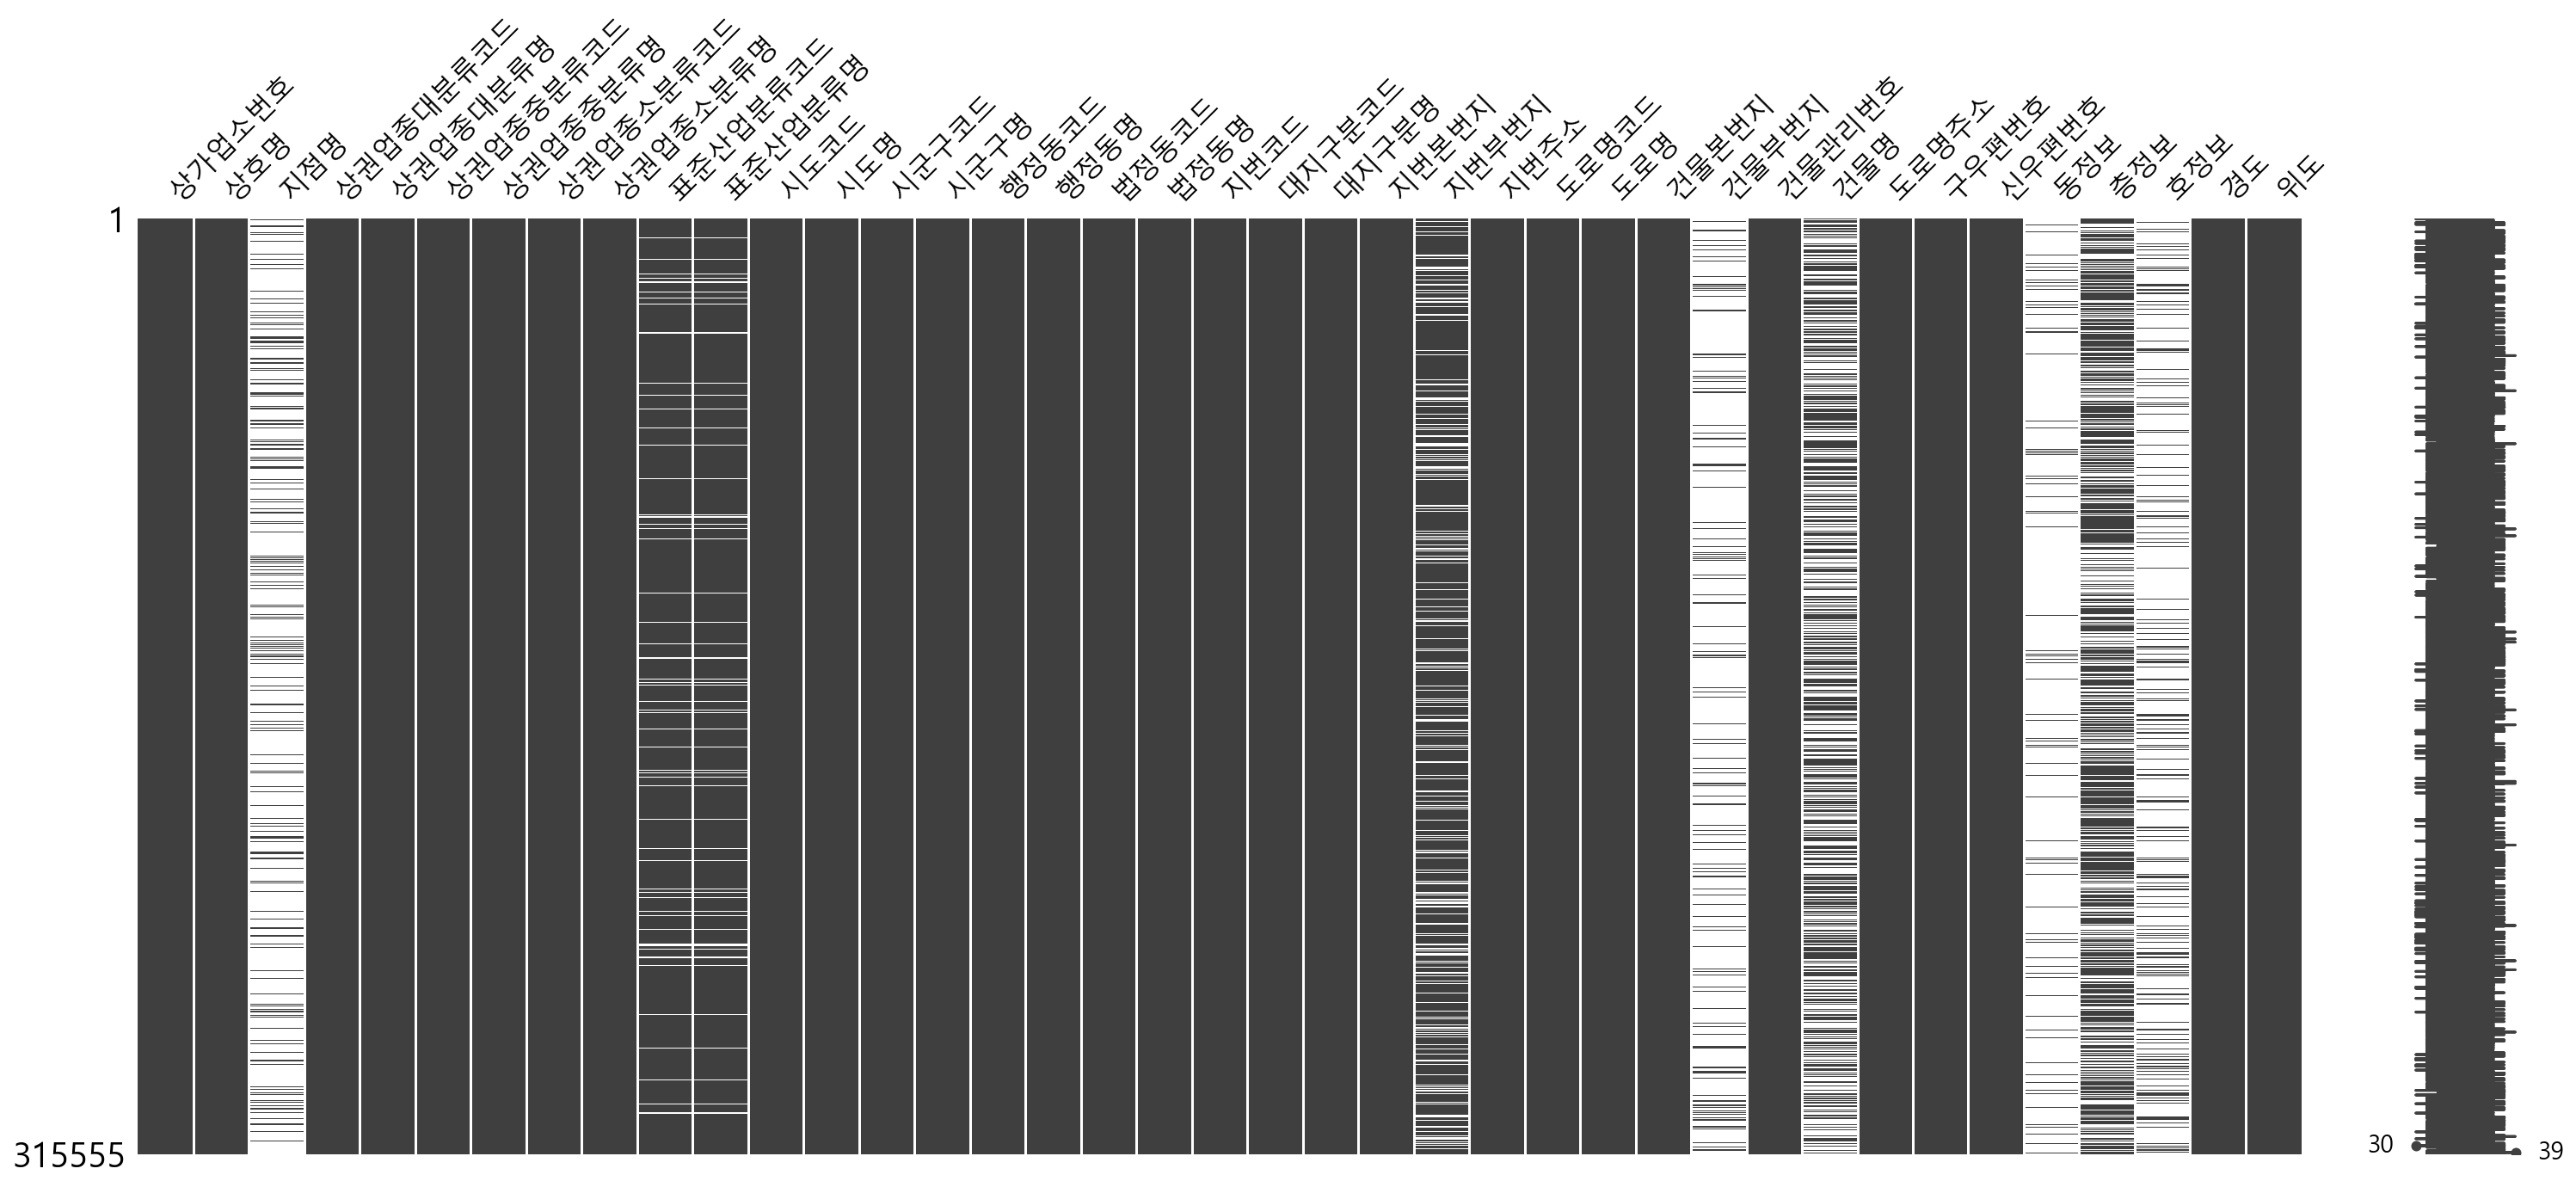

In [46]:
import missingno as msno

# 결측치를 한꺼번에 시각화
msno.matrix(df)

<AxesSubplot:>

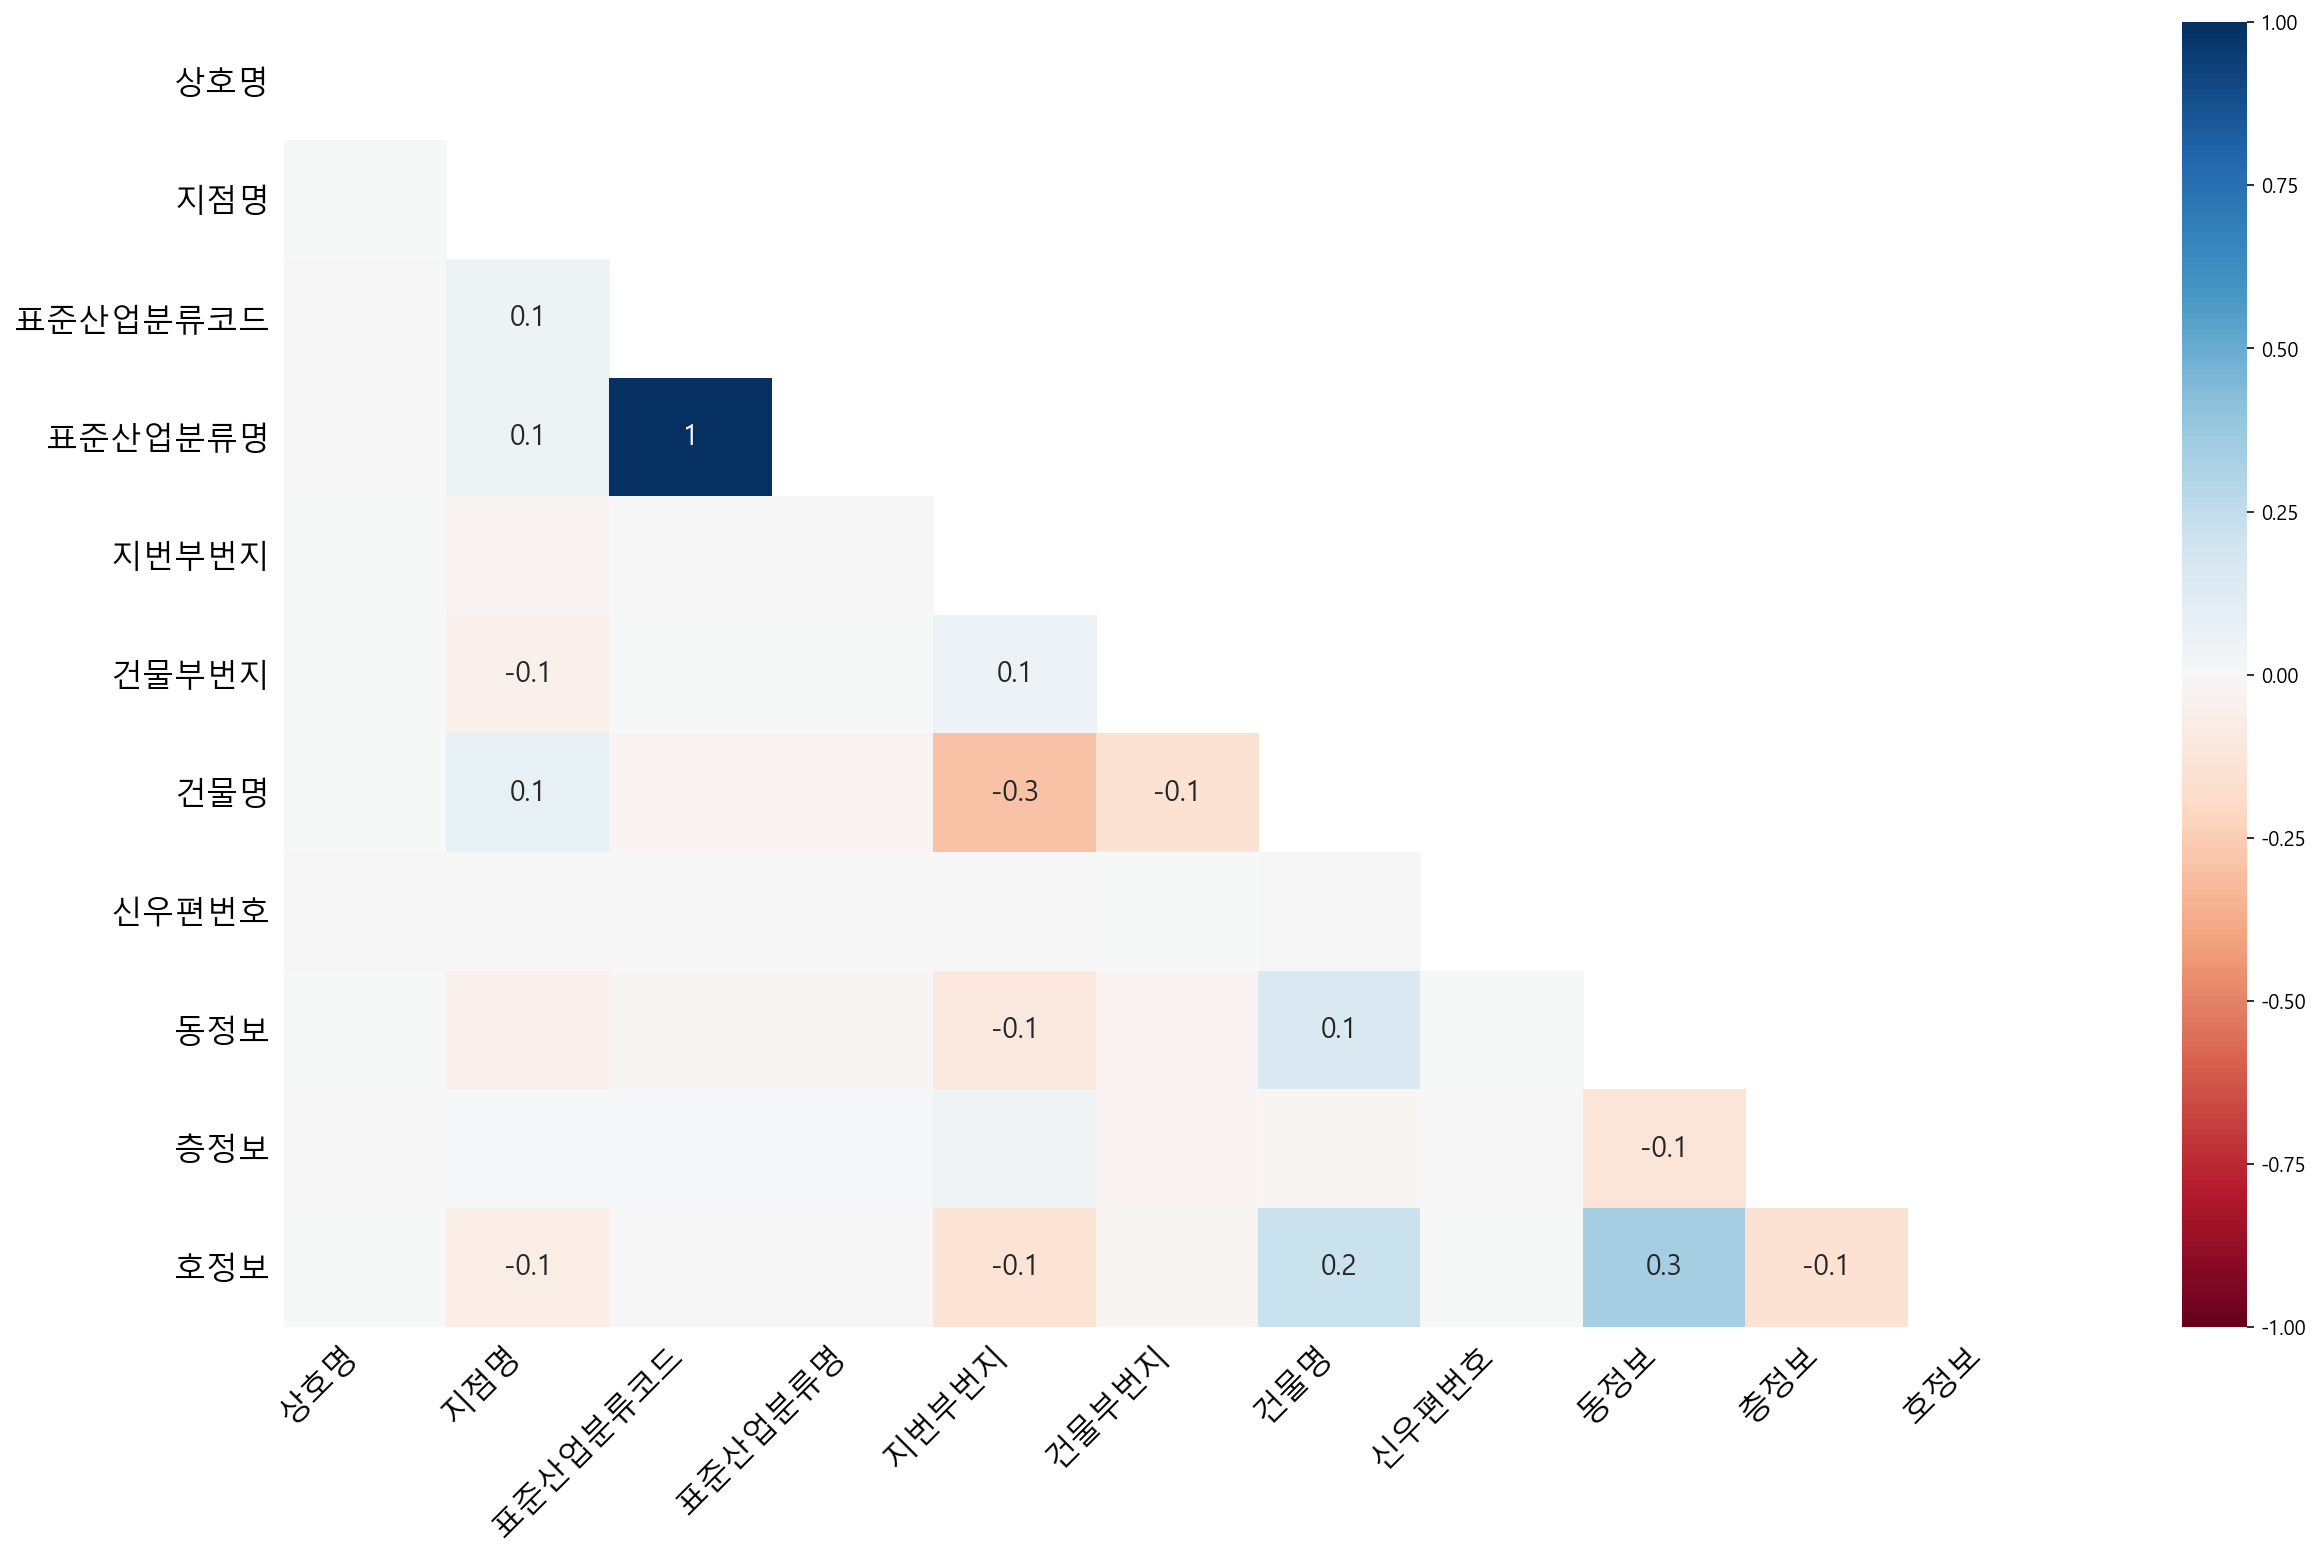

In [47]:
# 결측치를 heatmap으로 그리기

msno.heatmap(df)

* 결측치값으로 상관관계를 보는 것
* "표준산업분류명"과 "표준산업분류코드"가 상관관계가 굉장히 높다.
* 1일수록 양의상관관계, -일수록 음의상관관계

<AxesSubplot:>

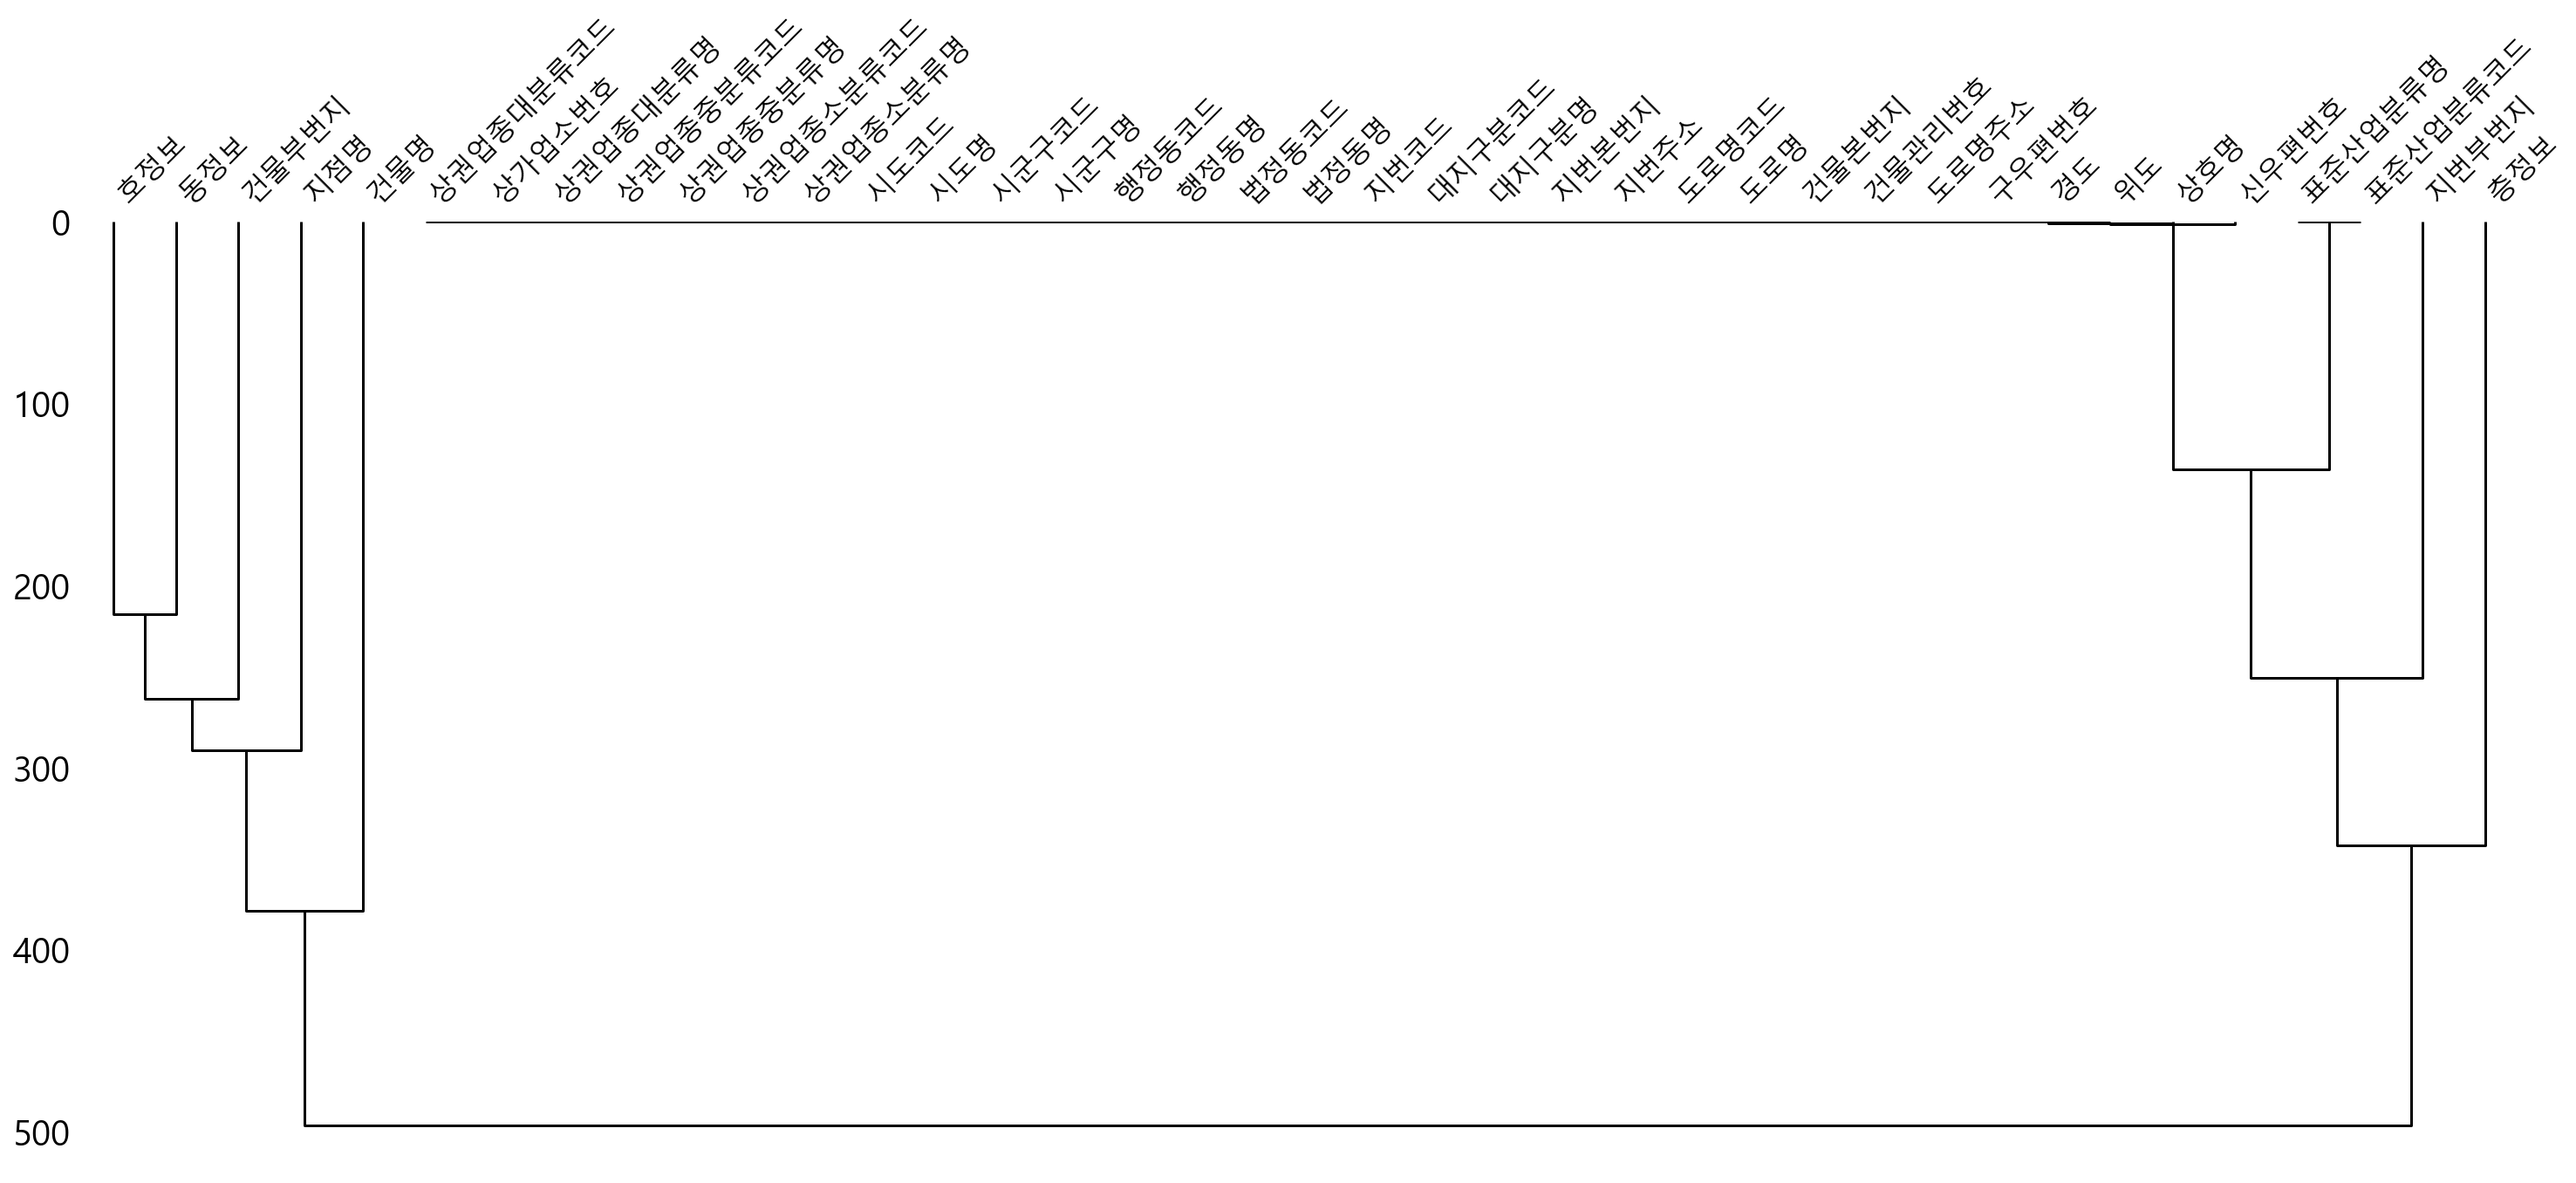

In [48]:
# 결측치를 dendrogram으로 그리기

msno.dendrogram(df)

어떤 데이터끼리 비슷한지 군집화를 해서 보여줌

# 사용하지 않는 컬럼 제거하기
## 결측치가 너무 많은 컬럼 제거하기
결측치가 많은 컬럼들은 가지고 있어도 메모리만 차지하니까 싹 정리해주기

In [57]:
# 결측치 많은 순서대로 정렬: sort_values
# 결측치 많은 데이터 9개를 가져와서 not_use 변수에 담기

not_use = n.sort_values(ascending=False).head(9)
not_use

동정보         291362
건물부번지       276299
호정보         264263
지점명         260566
건물명         166325
층정보         116888
지번부번지        62107
표준산업분류코드     18416
표준산업분류명      18416
dtype: int64

In [59]:
# not_use 데이터에서 컬럼 이름만 가져와서 not_use_col 변수에 넣기

not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '호정보', '지점명', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [62]:
# 사용하지 않는 컬럼 제거하기
# drop 옵션값 axis=0이면 행을 기준으로 데이터제거
# axis=1이어야 컬럼을 기준으로 데이터제거
# drop을 하게되면, df 데이터프레임에 다시 담아줘야 제거가 됨
# 39개 컬럼이 -> 30개로 줄어듬

print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(315555, 39)
(315555, 30)


In [63]:
# info()를 통해 해당 컬럼이 제거됐는지 확인 + 메모리 사용량이 줄어들었는지 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315555 entries, 0 to 315554
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     315555 non-null  int64  
 1   상호명        315554 non-null  object 
 2   상권업종대분류코드  315555 non-null  object 
 3   상권업종대분류명   315555 non-null  object 
 4   상권업종중분류코드  315555 non-null  object 
 5   상권업종중분류명   315555 non-null  object 
 6   상권업종소분류코드  315555 non-null  object 
 7   상권업종소분류명   315555 non-null  object 
 8   시도코드       315555 non-null  int64  
 9   시도명        315555 non-null  object 
 10  시군구코드      315555 non-null  int64  
 11  시군구명       315555 non-null  object 
 12  행정동코드      315555 non-null  int64  
 13  행정동명       315555 non-null  object 
 14  법정동코드      315555 non-null  int64  
 15  법정동명       315555 non-null  object 
 16  지번코드       315555 non-null  int64  
 17  대지구분코드     315555 non-null  int64  
 18  대지구분명      315555 non-null  object 
 19  지번본번지      315555 non-n

## 사용하지 않는 컬럼 제거하기

In [64]:
# 컬럼명을 전처리 하기위해 cols라는 변수에 담기

cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [68]:
# 컬럼명에 "코드"와 "번호"가 있는 컬럼은 이번 분석에서는 사용하지 않기 때문에
# 해당하는 컬럼만 찾아와서 cols_code라는 변수에 담기

cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [70]:
# "코드", "번호"가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거하기
# 제거 전,후에 shape를 통해 컬럼이 삭제되었는지 확인하기

print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

(315555, 30)
(315555, 16)


In [72]:
# info로 컬럼개수와 메모리 다운량 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315555 entries, 0 to 315554
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       315554 non-null  object 
 1   상권업종대분류명  315555 non-null  object 
 2   상권업종중분류명  315555 non-null  object 
 3   상권업종소분류명  315555 non-null  object 
 4   시도명       315555 non-null  object 
 5   시군구명      315555 non-null  object 
 6   행정동명      315555 non-null  object 
 7   법정동명      315555 non-null  object 
 8   대지구분명     315555 non-null  object 
 9   지번본번지     315555 non-null  int64  
 10  지번주소      315555 non-null  object 
 11  도로명       315555 non-null  object 
 12  건물본번지     315555 non-null  int64  
 13  도로명주소     315555 non-null  object 
 14  경도        315555 non-null  float64
 15  위도        315555 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 38.5+ MB


# 행, 열을 기준으로 값을 가져오기

## 열(column) 기준
* df[컬럼이름]
    * 결과가 pandas의 Series 형태로 반환
* df[[컬럼목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주기
    * 결과가 pandas의 DataFrame 형태로 반환
    * 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환됨

In [74]:
# "상호명" 컬럼만 가져오기

df["상호명"].head()

0       비지트
1      쓰리에프
2        채움
3     호구의주방
4    BYC상신점
Name: 상호명, dtype: object

In [80]:
# "상호명", "도로명주소" 2개의 컬럼 가져오기

df[["상호명", "도로명주소"]].head()

,상호명,도로명주소
0,비지트,서울특별시 서초구 동광로18길 82
1,쓰리에프,서울특별시 동작구 동작대로27가길 12
2,채움,서울특별시 종로구 삼봉로 81
3,호구의주방,서울특별시 영등포구 선유로 269
4,BYC상신점,서울특별시 송파구 오금로 527


In [78]:
# "상호명" 컬럼 하나만 가져올 때도, 데이터프레임으로 가져오려면 리스트에 넣어주기

df[["상호명"]].head()

,상호명
0,비지트
1,쓰리에프
2,채움
3,호구의주방
4,BYC상신점


## 행(row) 기준
* df.loc[행]
* df.loc[행, 열]

* df.loc[행이름 혹은 번호]
    * 결과가 pandas의 Series 형태로 반환
* df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 함
    * 결과가 pandas의 DataFrame 형태로 반환
    * 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환됨

In [81]:
# 0번째 인덱스 행 가지오기

df.loc[0]

상호명                          비지트
상권업종대분류명                      음식
상권업종중분류명                      한식
상권업종소분류명               한식/백반/한정식
시도명                        서울특별시
시군구명                         서초구
행정동명                        방배4동
법정동명                         방배동
대지구분명                         대지
지번본번지                        854
지번주소        서울특별시 서초구 방배동 854-18
도로명             서울특별시 서초구 동광로18길
건물본번지                         82
도로명주소        서울특별시 서초구 동광로18길 82
경도                    126.991394
위도                     37.488375
Name: 0, dtype: object

In [84]:
# 0, 1, 2번째 인덱스 행을 가져오기

df.loc[[0, 1, 2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,서울특별시 서초구 동광로18길 82,126.991394,37.488375
1,쓰리에프,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,대지,139,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길,12,서울특별시 동작구 동작대로27가길 12,126.980952,37.487105
2,채움,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,대지,58,서울특별시 종로구 수송동 58,서울특별시 종로구 삼봉로,81,서울특별시 종로구 삼봉로 81,126.981794,37.572387


In [85]:
# 0번째 행의 "상호명"만 가지고 오고 싶을 때

# df.loc[0]["상호명"] 이라고 해도 되지만 이렇게 가져오면 두 번 가져오는거고
# 아래처럼 가져오면 한 번에 가져와서 더 빨라

df.loc[0, "상호명"] 

'비지트'

In [87]:
# 0, 1, 2 번째 행의 "상호명", "도로명주소" 가져오기

df.loc[[0, 1, 2], ["상호명", "도로명주소"]]

,상호명,도로명주소
0,비지트,서울특별시 서초구 동광로18길 82
1,쓰리에프,서울특별시 동작구 동작대로27가길 12
2,채움,서울특별시 종로구 삼봉로 81


## iloc로 슬라이싱해서 가져오기
* df.iloc[:] 전체 데이터 가져오기
* df.iloc[행, 열] 순으로 인덱스 번호를 지정
* : 은 전체를 의미
* 시작인덱스 : 끝나는인덱스 +1
    * 예) 3:5 라면 3번째 인덱스부터 4번째 인덱스까지 가져옴
* : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미
    * 예) :5 => 처음부터 4번 인덱스까지
    * 예) 5: => 5번 인덱스부터 마지막 인덱스까지
    * 예) -5: => 뒤에서 5번째부터 끝까지
    * 예) :-5 => 처음부터 뒤에서 5번째 전까지

In [89]:
# 위에서 5개의 행, 왼쪽에서 5개의 열 가지고오기

df.iloc[:5, :5]   

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,비지트,음식,한식,한식/백반/한정식,서울특별시
1,쓰리에프,음식,한식,한식/백반/한정식,서울특별시
2,채움,음식,한식,한식/백반/한정식,서울특별시
3,호구의주방,소매,가정/주방/인테리어,주방가구판매,서울특별시
4,BYC상신점,소매,의복의류,셔츠/내의/속옷,서울특별시


In [91]:
# 끝에서 5개의 행, 오른쪽에서 5개의 열 가져오기

df.iloc[-5:, -5:]

,도로명,건물본번지,도로명주소,경도,위도
315550,서울특별시 영등포구 영등포로,103,서울특별시 영등포구 영등포로 103,126.893175,37.522059
315551,서울특별시 송파구 양재대로66길,30,서울특별시 송파구 양재대로66길 30,127.124403,37.500428
315552,서울특별시 강서구 마곡중앙2로,35,서울특별시 강서구 마곡중앙2로 35,126.830519,37.557983
315553,서울특별시 서초구 방배로34길,4,서울특별시 서초구 방배로34길 4,126.991262,37.492275
315554,서울특별시 강남구 테헤란로,124,서울특별시 강남구 테헤란로 124,127.031685,37.498776
